# Composing Music With Recurrent Neural Networks

In this project, we want to use an RNN (Baxial LSTM) to compose music with TensorFlow.

The model is adapted and improved from: http://www.hexahedria.com/2015/08/03/composing-music-with-recurrent-neural-networks/

In [6]:
import tensorflow as tf
import numpy as np
import itertools
import random
import pickle

## Data Format Processing
This part aims to get the features of the midi matrixs. 

Since the author uses Python 2 to implement this part, and some parts like "midi" package is not compatible with Python 3, so we pre-process the midi file on our local machine and get a "pkl" file which contains the midi dictionary which contains the midi state matrices for the midi files. The codes doing this is in the midi_to_pickle folder, where music contains the original midi and input contains the converted pickle file. Also, after getting the pickle file generated as output, we can use the python file in pickle_to_midi to convert it into midi files. To implement this notebook, you can just load the midi_dict file already in our file. If you want to try new music midi, you can add in the music file and regenerate the pickle file.

In [7]:
# loading preprocessing functions
from preprocess import *

In [8]:
# Load the midi state matrices
midi_dict = load_obj("midi_to_pickle/input/midi_dict")

## Biaxial RNN Model 
We build the Biaxial RNN model in TensorFlow.

In [9]:
batch_width = 10 # number of sequences in a batch
batch_len = 16*8 # length of each sequence

In [13]:
from model import training
tf.reset_default_graph()
train_acc_hist, loss_hist, train_precision_hist, train_recall_hist = training(batch_width, batch_len, midi_dict)

step 50: recall = 0.5521155830753354, precision = 0.05675429104873443
step 50: acc = 0.766486406326294, loss = 0.7582560777664185
step 100: recall = 0.5135608048993876, precision = 0.06123353761898553
step 100: acc = 0.8085888028144836, loss = 0.7582560777664185
step 150: recall = 0.4595503256986762, precision = 0.07111270078688951
step 150: acc = 0.8440556526184082, loss = 0.7582560777664185
step 200: recall = 0.3658637873754153, precision = 0.07562231759656653
step 200: acc = 0.8768429756164551, loss = 0.7582560777664185
step 250: recall = 0.33346955455659993, precision = 0.09229203189504044
step 250: acc = 0.9032800793647766, loss = 0.7582560777664185
step 300: recall = 0.2872086621398422, precision = 0.11816671700392631
step 300: acc = 0.9220603108406067, loss = 0.7582560777664185
step 350: recall = 0.2783029744062716, precision = 0.1367550419215953
step 350: acc = 0.9461688995361328, loss = 0.7582560777664185
step 400: recall = 0.3157262905162065, precision = 0.2413582135209544
st


Visualize training and testing results:

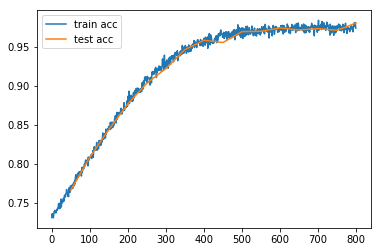

In [19]:
import matplotlib.pyplot as plt

# plot for training/testing acc
plt.plot(train_acc_hist, label="train acc")
plt.plot([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800], test_acc_hist, label="test acc")
plt.legend()
plt.show()

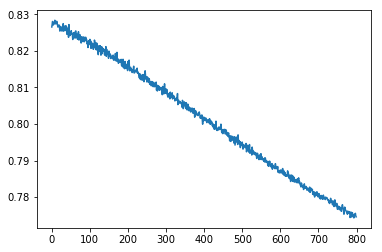

In [20]:
# plot for loss
plt.plot(loss_hist, label="train acc")
plt.show()

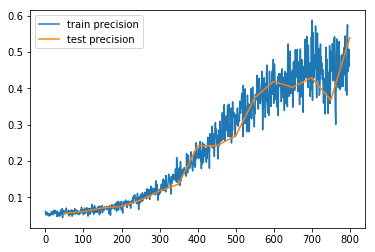

In [21]:
#plot for training/testing precision
plt.plot(train_precision_hist, label="train precision")
plt.plot([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800], test_precision_hist, label="test precision")
plt.legend()
plt.show()

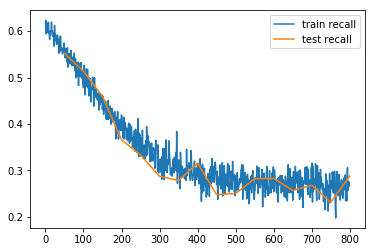

In [22]:
#plot for training/testing precision
plt.plot(train_recall_hist, label="train recall")
plt.plot([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800], test_recall_hist, label="test recall")
plt.legend()
plt.show()

The following is some past experimental data on different optimizer and network structure:

## Adam Optimizer Log
step 50: recall = 0.008058470764617692 
step 50: precision = 0.42574257425742573
step 50: acc = 0.973202109336853
step 100: recall = 0.0009591406100134279
step 100: precision = 0.35714285714285715
step 100: acc = 0.9738730788230896
step 150: recall = 0.0008722197993894462
step 150: precision = 0.5
step 150: acc = 0.9770333170890808
step 200: recall = 0.0015702108568864963
step 200: precision = 0.5384615384615384
step 200: acc = 0.9776791334152222

## Adadelta Optimizer
step 50: recall = 0.13473992061834134
step 50: precision = 0.028784362727597285
step 50: acc = 0.8702673316001892
step 100: recall = 0.10149461244351755
step 100: precision = 0.033039149128762164
step 100: acc = 0.8885115385055542
step 150: recall = 0.08617959737615924
step 150: precision = 0.027729257641921398
step 150: acc = 0.9128656387329102
step 200: recall = 0.05809414466130884
step 200: precision = 0.02461568398521113
step 200: acc = 0.9292517900466919

## Adadelta Optimizer with BN
step 50: recall = 0.43042553191489363
step 50: precision = 0.07739393243811929
step 50: acc = 0.8658203482627869
step 100: recall = 0.36162954043748746
step 100: precision = 0.09667900638446268
step 100: acc = 0.8997494578361511
step 150: recall = 0.3317641784353284
step 150: precision = 0.11716276124129196
step 150: acc = 0.9292217493057251
step 200: recall = 0.25496302063059556
step 200: precision = 0.14518452842735233
step 200: acc = 0.9422024488449097